In [1]:
import pandas as pd
import glob


table1_lines = [13, 14, 15]
table2_lines = [19, 20, 21]
table3_lines = [26, 27]

tables = {
    'table1': table1_lines,
    'table2': table2_lines,
    'table3': table3_lines
}

# List all .DAT files in the current directory
dat_files = glob.glob('*.DAT')

diameter = []
ac_calibration_k = []
ac_calibration_k_err = []
ac_calibration_kx = []
laser = []
laser_power = []
drag = []

for file_name in dat_files:
    print(f"Processing file: {file_name}")
    
    # Extract the substring indicating the laser type
    if '1064' in file_name:
        laser_type = '1064'
    else:
        laser_type = '976'
    
    # Append the laser type to the laser list
    laser.append([laser_type])
    
    # Extract the laser power from the file name
    if 'mW' in file_name:
        power_index = file_name.index('mW')
        laser_power_value = file_name[power_index - 3:power_index].strip()
    else:
        laser_power_value = '90'
    
    # Append the laser power to the laser power list
    laser_power.append([laser_power_value])
    
    for table_name, lines in tables.items():
        numerical_data = []
        with open(file_name, 'r') as file:
            for line_number, line in enumerate(file, start=1):
                if line_number in lines:
                    values = line.strip().split()
                    numerical_data.append(values)

        output_file_name = f'{table_name}.txt'
        with open(output_file_name, 'a') as output_file:
            for row in numerical_data:
                output_file.write('\t'.join(row) + '\n')

        print(f"Numerical data from Table {table_name} appended to {output_file_name}")


        # Collect the diameter value for the diameter file
        if table_name == 'table2' and len(numerical_data) >= 2 and len(numerical_data[1]) >= 11:
            diameter_value = numerical_data[1][10]
            diameter.append([diameter_value])

        # Collect the AC calibration k value for the ACcalibration_k file
        if table_name == 'table3' and len(numerical_data) >= 2 and len(numerical_data[1]) >= 3:
            ac_calibration_k_value = numerical_data[1][2]
            ac_calibration_k.append([ac_calibration_k_value])  

        # Collect the AC calibration k error value for the ACcalibration_k_err file
        if table_name == 'table3' and len(numerical_data) >= 2 and len(numerical_data[1]) >= 4:
            ac_calibration_k_err_value = numerical_data[1][3]
            ac_calibration_k_err.append([ac_calibration_k_err_value])
            
        # Collect the AC calibration y value for the drag file
        if table_name == 'table3' and len(numerical_data) >= 2 and len(numerical_data[1]) >= 5:
            drag_value = numerical_data[1][4]
            drag.append([drag_value])  
            
        # Store the numerator and denominator values from Table 1
        if table_name == 'table1' and len(numerical_data) >= 2 and len(numerical_data[1]) >= 9:
            numerator = float(numerical_data[0][8])
            denominator = float(numerical_data[1][8])
    
    # Calculate AC calibration kx using the numerator/denominator ratio and AC calibration k value
    if numerator is not None and denominator is not None and ac_calibration_k_value is not None:
        ac_calibration_kx_value = float(ac_calibration_k_value) * (numerator / denominator)
        ac_calibration_kx.append([ac_calibration_kx_value])
    else:
        ac_calibration_kx.append([''])

    print()

# Write diameter to a file
diameter_df = pd.DataFrame(diameter, columns=['Diameter'])
diameter_df.to_csv('diameter.txt', index=False, sep='\t')
print("Diameter data written to diameter.txt")

# Write AC calibration k to a file
ac_calibration_k_df = pd.DataFrame(ac_calibration_k, columns=['AC Calibration k'])
ac_calibration_k_df.to_csv('ACcalibration_k.txt', index=False, sep='\t')
print("AC Calibration k data written to ACcalibration_k.txt")

# Write AC calibration k error to a file
ac_calibration_k_err_df = pd.DataFrame(ac_calibration_k_err, columns=['AC Calibration k Error'])
ac_calibration_k_err_df.to_csv('ACcalibration_k_err.txt', index=False, sep='\t')
print("AC Calibration k Error data written to ACcalibration_k_err.txt")

# Write AC calibration drag to a file
drag_df = pd.DataFrame(drag, columns=['AC Calibration drag y'])
drag_df.to_csv('drag.txt', index=False, sep='\t')
print("AC Calibration drag data written to drag.txt")

# Write AC calibration kx to a file
ac_calibration_kx_df = pd.DataFrame(ac_calibration_kx, columns=['AC Calibration kx'])
ac_calibration_kx_df.to_csv('ACcalibration_kx.txt', index=False, sep='\t')
print("AC Calibration kx data written to ACcalibration_kx.txt")

# Write laser type to a file
laser_df = pd.DataFrame(laser, columns=['Laser Type'])
laser_df.to_csv('laser_type.txt', index=False, sep='\t')
print("Laser type data written to laser_type.txt")

# Write laser power to a file
laser_power_df = pd.DataFrame(laser_power, columns=['Laser Power'])
laser_power_df.to_csv('laser_power.txt', index=False, sep='\t')
print("Laser power data written to laser_power.txt")

# Read the AC calibration k data
ac_calibration_k_df = pd.read_csv('ACcalibration_k.txt', sep='\t')

# Read the AC calibration k error data
ac_calibration_k_err_df = pd.read_csv('ACcalibration_k_err.txt', sep='\t')

# Read the laser power data
laser_power_df = pd.read_csv('laser_power.txt', sep='\t')

# Perform the division
result_df = ac_calibration_k_df['AC Calibration k'] / laser_power_df['Laser Power']*1000
resulterror_df = ac_calibration_k_err_df['AC Calibration k Error'] / laser_power_df['Laser Power']*1000

# Create the K_mW_Y DataFrame
k_mw_y_df = pd.DataFrame(result_df, columns=['K_mW_Y'])
k_mw_y_err_df = pd.DataFrame(resulterror_df, columns=['K_mW_Y_err'])

# Write K_mW_Y to a file
k_mw_y_df.to_csv('K_mW_Y.txt', index=False, sep='\t')
k_mw_y_err_df.to_csv('K_mW_Y_err.txt', index=False, sep='\t')
print("K_mW_Y data written to K_mW_Y.txt")

# Read the AC calibration kx data
ac_calibration_kx_df = pd.read_csv('ACcalibration_kx.txt', sep='\t')

# Perform the division
result_x_df = ac_calibration_kx_df['AC Calibration kx'] / laser_power_df['Laser Power']*1000

# Create the K_mW_X DataFrame
k_mw_x_df = pd.DataFrame(result_x_df, columns=['K_mW_X'])

# Write K_mW_X to a file
k_mw_x_df.to_csv('K_mW_X.txt', index=False, sep='\t')
print("K_mW_X data written to K_mW_X.txt")

Processing file: PS 800 19 976 37mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 10013 976nm 37mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 10006 976nm 37mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 300 04 1064nm 45mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 500 01 1064nm 45mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Nume

Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 800 15 976 37mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 300 02 1064nm 45mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 10005 1064nm 45mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 1000 13 1064nm 45mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 500 07 1064nm 45mW.DAT

Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 800 05 976nm 37mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 300 16 1064nm 45mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 1000 08 1064nm 45mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 1450 17 1064 45mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 300 01 976nm 37mW.DA

Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 300 07 976nm 37mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 300 12 976nm 37mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 500 06 976nm 37mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 1450 10 976 37mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to 

Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 10006 1064nm 45mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 500 04 1064nm 45mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 800 07 976nm 37mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 300 01 1064nm 45mW.DAT
Numerical data from Table table1 appended to table1.txt
Numerical data from Table table2 appended to table2.txt
Numerical data from Table table3 appended to table3.txt

Processing file: PS 800 08 1064nm 45mW.DA

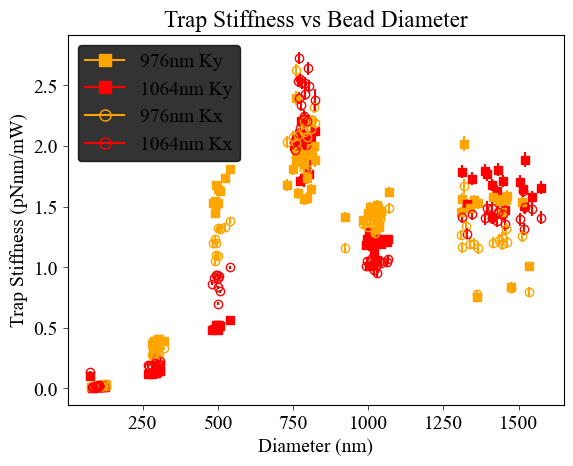

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from files
k_mw_y_df = pd.read_csv('K_mW_Y.txt', sep='\t')
k_mw_x_df = pd.read_csv('K_mW_X.txt', sep='\t')
diameter_df = pd.read_csv('diameter.txt', sep='\t')
k_mw_y_err_df = pd.read_csv('K_mW_Y_err.txt', sep='\t')
laser_type_df = pd.read_csv('laser_type.txt', sep='\t')

# Extract the data
k_mw_y_values = k_mw_y_df['K_mW_Y']
k_mw_x_values = k_mw_x_df['K_mW_X']
diameter_values = diameter_df['Diameter'] * 1e9  # Convert to nm
k_mw_y_err_values = k_mw_y_err_df['K_mW_Y_err']
laser_type_values = laser_type_df['Laser Type']

# Set the plot style to Times New Roman and font size to 14
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Set the figure background to black
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111, facecolor='white')

# Create a colormap based on laser type values
cmap = {976: 'orange', 1064: 'red'}

# Plot K_mW_Y with color-coded square markers
for i in range(len(diameter_values)):
    laser_type = laser_type_values[i]
    color = cmap.get(laser_type, 'white')
    ax.errorbar(diameter_values[i], k_mw_y_values[i], yerr=k_mw_y_err_values[i], fmt='s', color=color)

# Plot K_mW_X with color-coded circle markers
for i in range(len(diameter_values)):
    laser_type = laser_type_values[i]
    color = cmap.get(laser_type, 'white')
    ax.errorbar(diameter_values[i], k_mw_x_values[i], yerr=k_mw_y_err_values[i], fmt='o', markerfacecolor='none',
                markeredgecolor=color, color=color)

# Set the axis labels and text color to white
ax.set_xlabel('Diameter (nm)', color='black')
ax.set_ylabel('Trap Stiffness (pNnm/mW)', color='black')

# Set the tick color and width to white
ax.tick_params(colors='black', width=0.5)

# Set the axis line color to white
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Create the legend manually with white text
legend_elements = [
    plt.Line2D([0], [0], marker='s', color='orange', markerfacecolor='orange', label='976nm Ky', markersize=8),
    plt.Line2D([0], [0], marker='s', color='red', markerfacecolor='red', label='1064nm Ky', markersize=8),
    plt.Line2D([0], [0], marker='o', color='orange', markerfacecolor='none', markeredgecolor='orange', label='976nm Kx',
               markersize=8),
    plt.Line2D([0], [0], marker='o', color='red', markerfacecolor='none', markeredgecolor='red', label='1064nm Kx',
               markersize=8)
]
ax.legend(handles=legend_elements, loc='upper left', facecolor='black', edgecolor='black')

# Set the plot title with white color
plt.title('Trap Stiffness vs Bead Diameter', color='black')

# Save the plot as PNG using the title as the filename
filename = 'Trap_Stiffness_vs_Bead_Diameter.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

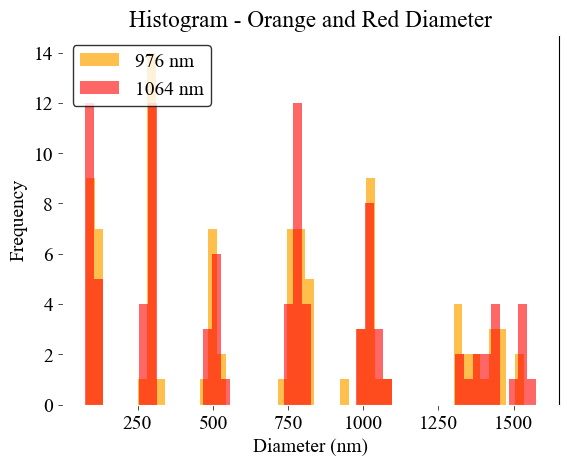

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the diameter and laser type files
diameter_df = pd.read_csv('diameter.txt', sep='\t')
laser_type_df = pd.read_csv('laser_type.txt', sep='\t')

# Filter the diameter data for orange laser type
orange_diameter = diameter_df[laser_type_df['Laser Type'] == 976]['Diameter'] * 1e9  # Convert to nm

# Filter the diameter data for red laser type
red_diameter = diameter_df[laser_type_df['Laser Type'] == 1064]['Diameter'] * 1e9  # Convert to nm

# Set the plot style to a professional-looking style
#plt.style.use('seaborn-black')

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot both histograms together
ax.hist(orange_diameter, bins=50, color='orange', alpha=0.7, label='976 nm')
ax.hist(red_diameter, bins=50, color='red', alpha=0.6, label='1064 nm')

# Set the axis labels
ax.set_xlabel('Diameter (nm)', color='black')
ax.set_ylabel('Frequency', color='black')

# Set the title
ax.set_title('Histogram - Orange and Red Diameter', color='black')

# Set the text color to white
plt.setp(ax.get_xticklabels(), color='black')
plt.setp(ax.get_yticklabels(), color='black')

# Set the spines color to white
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')

# Create the legend with white text and position it at the upper left
legend = ax.legend(facecolor='white', edgecolor='black', loc='upper left')
for text in legend.get_texts():
    text.set_color('black')

# Set the background color to black
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set the tick color and width to white
ax.tick_params(colors='black', width=0.5)

filenamehistogram = 'Histogram for the measured bead sizes.png'
plt.savefig(filenamehistogram, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

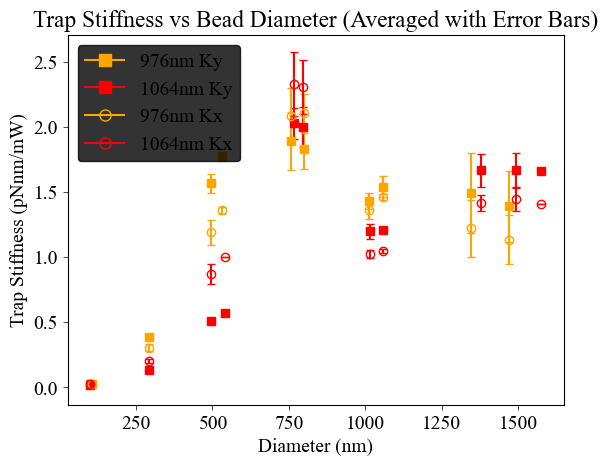

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from files
k_mw_y_df = pd.read_csv('K_mW_Y.txt', sep='\t')
k_mw_x_df = pd.read_csv('K_mW_X.txt', sep='\t')
diameter_df = pd.read_csv('diameter.txt', sep='\t')
laser_type_df = pd.read_csv('laser_type.txt', sep='\t')

# Extract the data
k_mw_y_values = k_mw_y_df['K_mW_Y']
k_mw_x_values = k_mw_x_df['K_mW_X']
diameter_values = diameter_df['Diameter'] * 1e9  # Convert to nm
laser_type_values = laser_type_df['Laser Type']

# Group the data by laser type
grouped_data = {}
for i in range(len(laser_type_values)):
    laser_type = laser_type_values[i]
    if laser_type not in grouped_data:
        grouped_data[laser_type] = {
            'diameter': [],
            'k_mw_y': [],
            'k_mw_x': []
        }
    grouped_data[laser_type]['diameter'].append(diameter_values[i])
    grouped_data[laser_type]['k_mw_y'].append(k_mw_y_values[i])
    grouped_data[laser_type]['k_mw_x'].append(k_mw_x_values[i])

# Calculate the number of windows based on the highest diameter value
max_diameter = max(diameter_values)
num_windows = int(np.ceil(max_diameter / 130))

# Calculate the averaged data for each window and laser type
averaged_data = {}
for laser_type, data in grouped_data.items():
    averaged_diameter_values = []
    averaged_k_mw_y_values = []
    averaged_k_mw_x_values = []
    averaged_k_mw_y_err_values = []
    averaged_diameter_err_values = []

    for window in range(num_windows):
        window_start = window * 130
        window_end = window_start + 130

        window_diameter = []
        window_k_mw_y = []
        window_k_mw_x = []

        for i in range(len(data['diameter'])):
            if window_start <= data['diameter'][i] < window_end:
                window_diameter.append(data['diameter'][i])
                window_k_mw_y.append(data['k_mw_y'][i])
                window_k_mw_x.append(data['k_mw_x'][i])

        if window_diameter:
            averaged_diameter = np.mean(window_diameter)
            averaged_k_mw_y = np.mean(window_k_mw_y)
            averaged_k_mw_x = np.mean(window_k_mw_x)
            std_k_mw_y = np.std(window_k_mw_y)
            std_k_mw_x = np.std(window_k_mw_x)

            averaged_diameter_values.append(averaged_diameter)
            averaged_k_mw_y_values.append(averaged_k_mw_y)
            averaged_k_mw_x_values.append(averaged_k_mw_x)
            averaged_k_mw_y_err_values.append(std_k_mw_y)
            averaged_diameter_err_values.append(std_k_mw_x)

    averaged_data[laser_type] = {
        'averaged_diameter': averaged_diameter_values,
        'averaged_k_mw_y': averaged_k_mw_y_values,
        'averaged_k_mw_x': averaged_k_mw_x_values,
        'averaged_k_mw_y_err': averaged_k_mw_y_err_values,
        'averaged_diameter_err': averaged_diameter_err_values
    }

# Set the plot style to Times New Roman and font size to 14
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Set the figure background to black
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111, facecolor='white')

# Create a colormap based on laser type values
cmap = {976: 'orange', 1064: 'red'}

# Plot averaged K_mW_Y with color-coded square markers and error bars
for laser_type, data in averaged_data.items():
    color = cmap.get(laser_type, 'white')
    ax.errorbar(data['averaged_diameter'], data['averaged_k_mw_y'], yerr=data['averaged_k_mw_y_err'],
                fmt='s', color=color, ecolor=color, capsize=3)

# Plot averaged K_mW_X with color-coded circle markers and error bars
for laser_type, data in averaged_data.items():
    color = cmap.get(laser_type, 'white')
    ax.errorbar(data['averaged_diameter'], data['averaged_k_mw_x'], yerr=data['averaged_diameter_err'],
                fmt='o', markerfacecolor='none', markeredgecolor=color, color=color, ecolor=color, capsize=3)

# Set the axis labels and text color to white
ax.set_xlabel('Diameter (nm)', color='black')
ax.set_ylabel('Trap Stiffness (pNnm/mW)', color='black')

# Set the tick color and width to white
ax.tick_params(colors='black', width=0.5)

# Set the axis line color to white
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

# Create the legend manually with white text
legend_elements = [
    plt.Line2D([0], [0], marker='s', color='orange', markerfacecolor='orange', label='976nm Ky', markersize=8),
    plt.Line2D([0], [0], marker='s', color='red', markerfacecolor='red', label='1064nm Ky', markersize=8),
    plt.Line2D([0], [0], marker='o', color='orange', markerfacecolor='none', markeredgecolor='orange', label='976nm Kx',
               markersize=8),
    plt.Line2D([0], [0], marker='o', color='red', markerfacecolor='none', markeredgecolor='red', label='1064nm Kx',
               markersize=8)
]
ax.legend(handles=legend_elements, loc='upper left', facecolor='black', edgecolor='black')

# Set the plot title with white color
plt.title('Trap Stiffness vs Bead Diameter (Averaged with Error Bars)', color='black')

# Save the plot as PNG using the title as the filename
filename = 'Trap_Stiffness_vs_Bead_Diameter_averaged_errorbars.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()